## Домашнее задание № 19
### Козел А.Г. v1 22.12.2022 - 5.01.2023


* Выполнить Стэкинг, Бэгин и Бустинг. При реализации алгоритмов не использовать готовые решения. 
* За сравнение взять CatBoostClassifier как базовая метрика качества.
* Сравнить результат с реализацией своих ансамблей. 
Для однозначности и интерпретируемости результатов использовать приложенный набор данных. 

* При реализации бустинга - просто сокращайте набор данных на котором модель отработала хорошо (правильно предсказанные данные). 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelBinarizer


In [2]:
df = pd.read_csv('winequality-white.csv', sep=';', encoding="cp1251") 

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Для получения дополнительной информации см. [Cortez et al., 2009].
Входные параметры (на основе физико-химических тестов):
* 1 - fixed acidity-фиксированная кислотность
* 2 - volatile acidity - летучая кислотность
* 3 - citric acid - лимонная кислота
* 4 - residual sugar - остаточный сахар
* 5 - chlorides - хлориды
* 6 - free sulfur dioxide - свободный диоксид серы
* 7 - total sulfur dioxide - общий диоксид серы
* 8 - density - плотность
* 9 - рН
* 10 - sulphates - сульфаты
* 11 - alcohol - спирт
#### Выходная переменная (на основе сенсорных данных):
* 12 - quality (score between 0 and 10) - качество (оценка от 0 до 10)

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


#### Нет пропущенных значений.

In [6]:
df.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

#### Все признаки категориальные (имеют много уникальных значений)

### Удаление дубликатов

In [7]:
df[df.duplicated()].shape

(937, 12)

In [8]:
df = df.drop_duplicates(keep='first').reset_index()
df.index = df['index']
df = df.drop(["index"], axis=1)

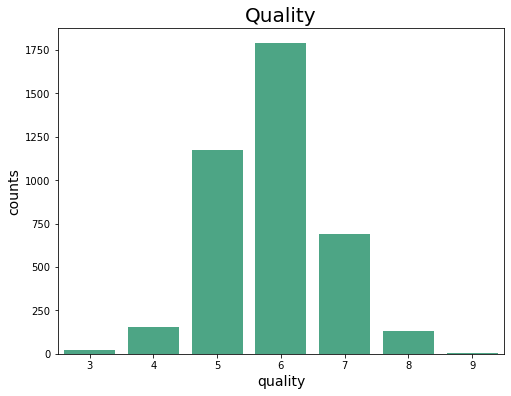

In [9]:
quality_ = df['quality'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=quality_.index, y=quality_.values, 
            color='#3eb489')
plt.title('Quality', fontsize=20)
plt.xlabel('quality', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.show()




### Разделим вино на группы:
* "1" - 3,4 - плохое вино
* "2" - 5-7 - неплохое 
* "3" - 8,9 - хорошее

In [10]:
df['class'] = [0 if x < 6 else 1 for x in df.quality]
df['class'] = df['class'].astype("object")
df['class'].value_counts()

1    2613
0    1348
Name: class, dtype: int64

<AxesSubplot:title={'center':'Корреляционная матрица'}>

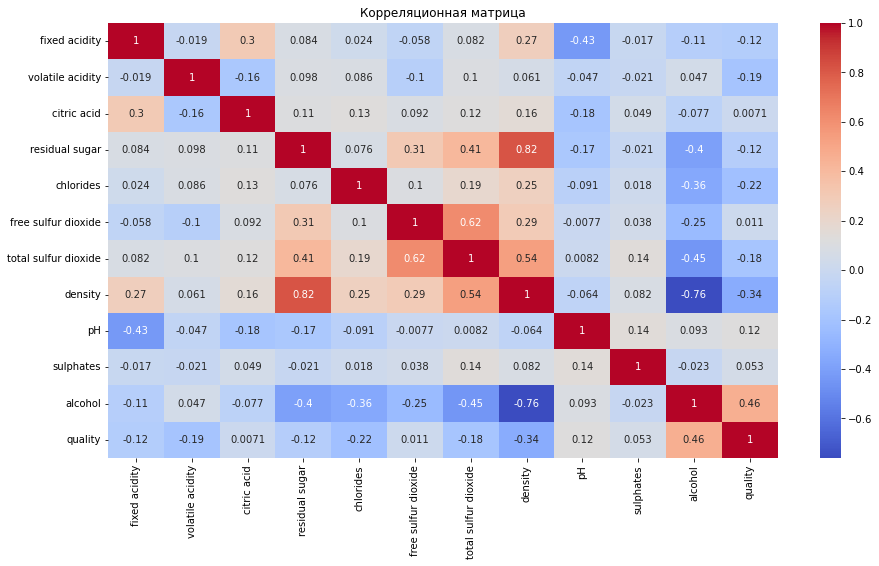

In [11]:
plt.figure(figsize=(15,8))
plt.title("Корреляционная матрица")
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

* density (плотность) сильно коррелирует с  residual_sugar (остаточный сахар)  и alcohol (спирт)
*  total sulfur dioxide (общий диоксид серы) коррелирует с free sulfur dioxide (свободный диоксид серы),  density (плотность), alcohol (спирт), residual sugar (остаточный сахар)
* Целевая переменная quality (качество) лучше всего коррелирует с переменной alcohol, чуть хуже с density (плотность)

##  CatBoostClassifier

https://www.kaggle.com/code/prashant111/catboost-classifier-in-python

#### Подготовка данных 

Вектор признаков и целевая переменная

In [12]:
X = df.drop("quality", axis=1)
y = df["quality"]

Объявление категориальных признаков¶

In [13]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


Разделение данных на обучающий и проверочный набор 

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import  f1_score,accuracy_score
                             

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=1000, 
    learning_rate=0.1, 
    loss_function='MultiClass'
)


clf.fit(X_train, y_train, 
        #cat_features=cat_features, 
        eval_set=(X_test, y_test), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 1000, 'learning_rate': 0.1, 'loss_function': 'MultiClass'}


In [16]:
clf = CatBoostClassifier(
    iterations=2000,
    verbose=5,
)

clf.fit(
    X_train, y_train,
    #cat_features=cat_features,
    eval_set=(X_test, y_test),
)

Learning rate set to 0.084791
0:	learn: 1.7052419	test: 1.7147255	best: 1.7147255 (0)	total: 28.4ms	remaining: 56.7s
5:	learn: 1.1291964	test: 1.1479451	best: 1.1479451 (5)	total: 129ms	remaining: 42.9s
10:	learn: 0.8972957	test: 0.9234645	best: 0.9234645 (10)	total: 217ms	remaining: 39.3s
15:	learn: 0.7743538	test: 0.8062020	best: 0.8062020 (15)	total: 340ms	remaining: 42.1s
20:	learn: 0.7000991	test: 0.7360229	best: 0.7360229 (20)	total: 459ms	remaining: 43.2s
25:	learn: 0.6523302	test: 0.6942546	best: 0.6942546 (25)	total: 583ms	remaining: 44.3s
30:	learn: 0.6184736	test: 0.6639341	best: 0.6639341 (30)	total: 686ms	remaining: 43.6s
35:	learn: 0.5941618	test: 0.6441498	best: 0.6441498 (35)	total: 804ms	remaining: 43.9s
40:	learn: 0.5766840	test: 0.6314772	best: 0.6314772 (40)	total: 937ms	remaining: 44.8s
45:	learn: 0.5653625	test: 0.6229458	best: 0.6229458 (45)	total: 1.03s	remaining: 43.6s
50:	learn: 0.5541652	test: 0.6164858	best: 0.6164858 (50)	total: 1.1s	remaining: 42.2s
55:	le

460:	learn: 0.2573779	test: 0.6057195	best: 0.5936807 (134)	total: 8.65s	remaining: 28.9s
465:	learn: 0.2548593	test: 0.6059176	best: 0.5936807 (134)	total: 8.72s	remaining: 28.7s
470:	learn: 0.2529722	test: 0.6054735	best: 0.5936807 (134)	total: 8.8s	remaining: 28.6s
475:	learn: 0.2506577	test: 0.6059046	best: 0.5936807 (134)	total: 8.87s	remaining: 28.4s
480:	learn: 0.2490574	test: 0.6055694	best: 0.5936807 (134)	total: 8.94s	remaining: 28.2s
485:	learn: 0.2472298	test: 0.6062736	best: 0.5936807 (134)	total: 9.01s	remaining: 28.1s
490:	learn: 0.2451919	test: 0.6062452	best: 0.5936807 (134)	total: 9.09s	remaining: 27.9s
495:	learn: 0.2431838	test: 0.6063584	best: 0.5936807 (134)	total: 9.16s	remaining: 27.8s
500:	learn: 0.2407480	test: 0.6069974	best: 0.5936807 (134)	total: 9.23s	remaining: 27.6s
505:	learn: 0.2390408	test: 0.6074603	best: 0.5936807 (134)	total: 9.31s	remaining: 27.5s
510:	learn: 0.2375199	test: 0.6076476	best: 0.5936807 (134)	total: 9.38s	remaining: 27.3s
515:	learn:

920:	learn: 0.1327875	test: 0.6444630	best: 0.5936807 (134)	total: 18.5s	remaining: 21.6s
925:	learn: 0.1318286	test: 0.6451233	best: 0.5936807 (134)	total: 18.6s	remaining: 21.6s
930:	learn: 0.1310641	test: 0.6457409	best: 0.5936807 (134)	total: 18.7s	remaining: 21.5s
935:	learn: 0.1302416	test: 0.6459839	best: 0.5936807 (134)	total: 18.8s	remaining: 21.4s
940:	learn: 0.1293649	test: 0.6467934	best: 0.5936807 (134)	total: 18.9s	remaining: 21.3s
945:	learn: 0.1284712	test: 0.6473050	best: 0.5936807 (134)	total: 19.1s	remaining: 21.2s
950:	learn: 0.1280051	test: 0.6475636	best: 0.5936807 (134)	total: 19.2s	remaining: 21.1s
955:	learn: 0.1274202	test: 0.6480786	best: 0.5936807 (134)	total: 19.3s	remaining: 21.1s
960:	learn: 0.1266919	test: 0.6488242	best: 0.5936807 (134)	total: 19.4s	remaining: 21s
965:	learn: 0.1256786	test: 0.6486631	best: 0.5936807 (134)	total: 19.5s	remaining: 20.9s
970:	learn: 0.1250631	test: 0.6491766	best: 0.5936807 (134)	total: 19.6s	remaining: 20.8s
975:	learn: 

1380:	learn: 0.0811627	test: 0.6801485	best: 0.5936807 (134)	total: 28.2s	remaining: 12.6s
1385:	learn: 0.0807367	test: 0.6804247	best: 0.5936807 (134)	total: 28.3s	remaining: 12.5s
1390:	learn: 0.0802310	test: 0.6809120	best: 0.5936807 (134)	total: 28.4s	remaining: 12.4s
1395:	learn: 0.0797466	test: 0.6812582	best: 0.5936807 (134)	total: 28.5s	remaining: 12.3s
1400:	learn: 0.0794581	test: 0.6814504	best: 0.5936807 (134)	total: 28.6s	remaining: 12.2s
1405:	learn: 0.0791317	test: 0.6819856	best: 0.5936807 (134)	total: 28.7s	remaining: 12.1s
1410:	learn: 0.0785911	test: 0.6821925	best: 0.5936807 (134)	total: 28.8s	remaining: 12s
1415:	learn: 0.0782635	test: 0.6827344	best: 0.5936807 (134)	total: 28.9s	remaining: 11.9s
1420:	learn: 0.0778201	test: 0.6834123	best: 0.5936807 (134)	total: 29s	remaining: 11.8s
1425:	learn: 0.0774473	test: 0.6840761	best: 0.5936807 (134)	total: 29.1s	remaining: 11.7s
1430:	learn: 0.0769257	test: 0.6840813	best: 0.5936807 (134)	total: 29.2s	remaining: 11.6s
143

1840:	learn: 0.0547632	test: 0.7117294	best: 0.5936807 (134)	total: 37.5s	remaining: 3.24s
1845:	learn: 0.0544211	test: 0.7123046	best: 0.5936807 (134)	total: 37.6s	remaining: 3.13s
1850:	learn: 0.0542507	test: 0.7124804	best: 0.5936807 (134)	total: 37.6s	remaining: 3.03s
1855:	learn: 0.0540290	test: 0.7132093	best: 0.5936807 (134)	total: 37.7s	remaining: 2.92s
1860:	learn: 0.0537621	test: 0.7136754	best: 0.5936807 (134)	total: 37.8s	remaining: 2.82s
1865:	learn: 0.0535569	test: 0.7136833	best: 0.5936807 (134)	total: 37.9s	remaining: 2.72s
1870:	learn: 0.0534490	test: 0.7139254	best: 0.5936807 (134)	total: 37.9s	remaining: 2.61s
1875:	learn: 0.0532312	test: 0.7142385	best: 0.5936807 (134)	total: 38s	remaining: 2.51s
1880:	learn: 0.0529844	test: 0.7140763	best: 0.5936807 (134)	total: 38.1s	remaining: 2.41s
1885:	learn: 0.0527197	test: 0.7148375	best: 0.5936807 (134)	total: 38.1s	remaining: 2.31s
1890:	learn: 0.0525502	test: 0.7152087	best: 0.5936807 (134)	total: 38.2s	remaining: 2.2s
18

In [17]:
print(clf.predict_proba(X_test))

[[0.04041546 0.30656843 0.61539489 ... 0.00799049 0.01259093 0.00707655]
 [0.00296194 0.00325153 0.00316661 ... 0.11726308 0.01587765 0.0030996 ]
 [0.0066326  0.03850641 0.94875791 ... 0.00163034 0.00124207 0.00099492]
 ...
 [0.00284055 0.0019562  0.00328261 ... 0.29831759 0.04936037 0.00439499]
 [0.00213489 0.00257506 0.00224481 ... 0.21454028 0.04019229 0.00244754]
 [0.00140928 0.00144419 0.00272376 ... 0.36997675 0.09841645 0.00302562]]


In [18]:
clf = CatBoostClassifier(
    iterations=153,
    random_seed=42,
    learning_rate=0.1,
    custom_loss=['AUC', 'Accuracy']
)

clf.fit(
    X_train, y_train,
    #cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [19]:
pred_cat = clf.predict(X_test)
print(f1_score(y_test, pred_cat, average='weighted'))
print(accuracy_score(y_test, pred_cat))

0.711175287107817
0.7616645649432535


## Stacking

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
import warnings
warnings.filterwarnings('ignore')

estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())


clf.fit(X_train, y_train).score(X_test, y_test)


0.7629255989911727

In [21]:
y_pred=clf.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_test, y_pred))

0.7100565300381686
0.7629255989911727


### Stacking Собственная реализация

In [22]:
RFC = RandomForestClassifier()
RFC.fit (StandardScaler().fit_transform(X_train), y_train)
predict_RFC = RFC.predict (StandardScaler().fit_transform(X_test))

LR = LogisticRegression(max_iter=1000)
LR.fit (StandardScaler().fit_transform(X_train), y_train)
predict_LR = LR.predict (StandardScaler().fit_transform(X_test))

LSVC = LinearSVC()
LSVC.fit (StandardScaler().fit_transform(X_train), y_train)
predict_LSVC = LSVC.predict (StandardScaler().fit_transform(X_test))

In [23]:
predict_stacking = np.stack ((predict_RFC, predict_LR, predict_LSVC), axis = 1)
LR. fit (predict_stacking, y_test)
y_pred = LR.predict(predict_stacking)
print(f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_test, y_pred))

0.6805237331733159
0.7490542244640606


## Bagging

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [24]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(SVC(), n_estimators=10, random_state=0).fit(X_train, y_train)

clf.fit(X_train, y_train).score(X_test, y_test)


0.43253467843631777

In [25]:
y_pred=clf.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_test, y_pred))

0.31567806654087927
0.43253467843631777


## Boosting

#### GradientBoostingClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [51]:
 from sklearn.ensemble import GradientBoostingClassifier

In [52]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.7402269861286255

In [53]:
y_pred=clf.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_test, y_pred))

0.6949668894947122
0.7402269861286255


#### AdaBoostClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [54]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier (n_estimators=100, random_state=0)

clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.7364438839848676

In [55]:
y_pred=clf.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted'))
print(accuracy_score(y_test, y_pred))

0.6665274957062196
0.7364438839848676


## Выводы
### CatBoostClassifier¶ 
* f1_score 0.711175287107817
* accuracy_score  0.7616645649432535
### Stacking¶
* f1_score 0.7100565300381686 
* accuracy_score 0.7629255989911727
### Stacking¶ собственная реализация
* f1_score 0.6805237331733159 
* accuracy_score 0.7490542244640606
### Bagging
* f1_score 0.31567806654087927 
* accuracy_score 0.43253467843631777
### GradientBoostingClassifier¶
* f1_score 0.6949668894947122 
* accuracy_score 0.7402269861286255
### AdaBoostClassifier
* f1_score 0.6665274957062196
* accuracy_score  0.7364438839848676

### Bagging Собственная реализация 

In [50]:
n = 10
k = 1 / n
models = []

for i in range(n):
    RFC = RandomForestClassifier(n_estimators=800, max_depth=20,random_state=42, n_jobs=-1)
    N = int(k*len(X_train))
    idx = np.random.randint(0, N) 
    
    
    X_bag = X_train[idx]
    y_bag = y_train[idx]
    
    RFC.fit(X_bag, y_bag)
    models.append(RFC)

for model in models:
    predictions = model.predict(X_test)
    print(f1_score(y_test, predictions, average='weighted'))
    print(accuracy_score(y_test, predictions))


KeyError: 44